# Summer of Code - Artificial Intelligence

## Week 05: Machine Learning

### Day 03: Univariate Linear Regression and Gradient Descent


# Mathematical Foundations of Univariate Linear Regression

## What is Univariate Linear Regression?

**Univariate Linear Regression** is a statistical method used to model the relationship between a single independent variable (feature) and a dependent variable (target) using a linear equation.


In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [62]:
X = np.linspace(0, 200, 100)
X[:5]


array([0.        , 2.02020202, 4.04040404, 6.06060606, 8.08080808])

In [63]:
y = 3*X + 3*np.random.normal(0, 10, 100)

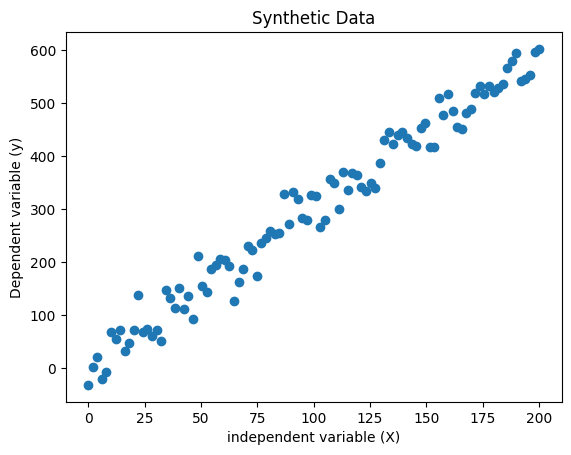

In [65]:
plt.scatter(X, y)
plt.title('Synthetic Data')
plt.xlabel("independent variable (X)")
plt.ylabel("Dependent variable (y)")
plt.show()

## Goal of Linear Regression

To find the best values of **$w_0$** and **$w_1$** that minimize the difference between predicted values and actual values.


# Components of Linear Regression
## Hypothesis Function
The hypothesis function for univariate linear regression is a linear equation:
$$
h(x) = w_0 + w_1x
$$

Where:
- **$h(x)$**: Hypothesis function (prediction)
- **$w_0$**: Bias term (y-intercept)
- **$w_1$**: Weight (slope)
- **$x$**: Input feature


In [66]:
def model(X, w0, w1):
    output = w0 + w1 * X
    return output

In [89]:
w0, w1 = 5, 2
pred = model(X, w0, w1)
pred

array([  5.        ,   9.04040404,  13.08080808,  17.12121212,
        21.16161616,  25.2020202 ,  29.24242424,  33.28282828,
        37.32323232,  41.36363636,  45.4040404 ,  49.44444444,
        53.48484848,  57.52525253,  61.56565657,  65.60606061,
        69.64646465,  73.68686869,  77.72727273,  81.76767677,
        85.80808081,  89.84848485,  93.88888889,  97.92929293,
       101.96969697, 106.01010101, 110.05050505, 114.09090909,
       118.13131313, 122.17171717, 126.21212121, 130.25252525,
       134.29292929, 138.33333333, 142.37373737, 146.41414141,
       150.45454545, 154.49494949, 158.53535354, 162.57575758,
       166.61616162, 170.65656566, 174.6969697 , 178.73737374,
       182.77777778, 186.81818182, 190.85858586, 194.8989899 ,
       198.93939394, 202.97979798, 207.02020202, 211.06060606,
       215.1010101 , 219.14141414, 223.18181818, 227.22222222,
       231.26262626, 235.3030303 , 239.34343434, 243.38383838,
       247.42424242, 251.46464646, 255.50505051, 259.54

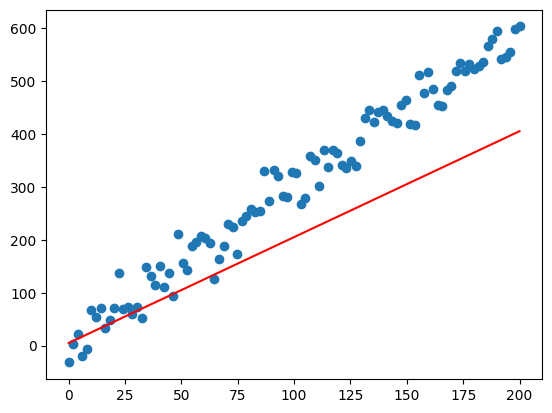

In [86]:
plt.scatter(X, y)
plt.plot(X, pred, c='red')
plt.show()

## Cost Function

We use the **Mean Squared Error (MSE)** to quantify this difference, and call it cost:

$$
J(w_0, w_1) = (1/2m) × \sum_{i=1}^{m} (h(x^i) - y^i)^2
$$

Where:
- **$m$**: Number of training examples
- **$h(x^i)$**: Prediction for i-th example
- **$y^i$**: Actual value for i-th example


In [90]:
def cost_function(pred, actual):
    m = len(pred)

    cost = (1/2*m) * np.sum((pred - actual) ** 2)
    return cost

In [84]:
actual_a = np.array([2, 3, 4])
pred_a = np.array([4, 5, 7])

cost_function(pred_a, actual_a)

np.float64(25.5)

In [91]:
cost = cost_function(pred, y)
cost

np.float64(65383160.723822296)

In [92]:
w0, w1

(5, 2)

In [94]:
# (w0, w1)
parameters = [(5, 2), (1, 1), (0.3, 2), (5, 4)]
for param in parameters:
    w0, w1 = param
    pred = model(X, w0, w1)
    cost = cost_function(pred, y)
    print(f"Parameters: w0: {w0}, w1: {w1}")
    print(f"Cost: {cost}")

Parameters: w0: 5, w1: 2
Cost: 65383160.723822296
Parameters: w0: 1, w1: 1
Cost: 268479682.931542
Parameters: w0: 0.3, w1: 2
Cost: 69997713.85399845
Parameters: w0: 5, w1: 4
Cost: 77036876.84803374


# Understanding Gradient Descent

## What is Gradient Descent?

**Gradient Descent** is an optimization algorithm used to minimize the cost function by iteratively adjusting the parameters in the direction of steepest descent.

## How Gradient Descent Works

1. **Start** with initial parameter values (w₀, w₁)
2. **Calculate** the gradient (partial derivatives)
3. **Update** parameters in the opposite direction of gradient
4. **Repeat** until convergence

# Mathematical Formulation

## Partial Derivatives:
$$∂J/∂w₀ = \frac{1}{m} \sum_{i=1}^{m} \left( h(x^{i}) - y^{i} \right)$$
$$∂J/∂w₁ = \frac{1}{m} \sum_{i=1}^{m} \left( h(x^{i}) - y^{i} \right) x^{i}$$


## Parameter Updates:
$$
w_0 = w_0 - \alpha \frac{\partial J}{\partial w_0}
$$
$$
w_1 = w_1 - \alpha \frac{\partial J}{\partial w_1}
$$

Where $\alpha$ is the learning rate.

## Learning Rate Importance

- **Too small**: Slow convergence
- **Too large**: May overshoot the minimum
- **Just right**: Efficient convergence


In [108]:
def compute_gradients(X, pred, actual):
    m = len(X)
    grad_w0 = 1/m * np.sum(pred - actual)
    grad_w1 = 1/m * np.sum((pred - actual) * X)

    return grad_w0, grad_w1

In [109]:
w0, w1

(5, 4)

In [110]:
cost_function(pred, y)

np.float64(77036876.84803374)

In [111]:
compute_gradients(X, pred, y)

(np.float64(104.16801850688994), np.float64(13983.359206883977))

In [117]:
def update_parameters(w0, w1, grad_w0, grad_w1, lr=0.001):
    w0 = w0 - lr * grad_w0
    w1 = w1 - lr * grad_w1
    
    return w0, w1

In [115]:
w0, w1 = 0, 1
pred = model(X, w0, w1)
cost = cost_function(pred, y)
cost

np.float64(270483002.74647313)

In [116]:
grad_w0, grad_w1 = compute_gradients(X, pred, y)
grad_w0, grad_w1

(np.float64(-200.83198149311013), np.float64(-26718.660995136233))

In [150]:
update_parameters(w0, w1, grad_w0, grad_w1)


(np.float64(0.2119944708034664), np.float64(29.195114918096415))

In [173]:
def gradient_descent(X, y, w0, w1, lr=0.01, iterations=500):
    print(f"Started training for {iterations} iterations with gradient descent:")
    print(f"Initial model parameters: w0: {w0}, w1: {w1}")
    for i in range(iterations):
        pred = model(X, w0, w1)
        cost = cost_function(pred, y)
        grad_w0, grad_w1 = compute_gradients(X, pred, y)
        w0, w1 = update_parameters(w0, w1, grad_w0, grad_w1, lr)
        if i % 100 == 0:
            print(f"Cost: {cost}")
    
    return w0, w1

In [182]:
w0, w1 = 0, 1
w0, w1 = gradient_descent(X, y, w0, w1, lr=0.00001, iterations=1000)
print(f"Final updated parameters after 100 iteration: w0: {w0}, w1: {w1}")

Started training for 1000 iterations with gradient descent:
Initial model parameters: w0: 0, w1: 1
Cost: 270483002.74647313
Cost: 4120463.7038185946
Cost: 4120442.8337750826
Cost: 4120421.974405245
Cost: 4120401.125619064
Cost: 4120380.2874111687
Cost: 4120359.459776188
Cost: 4120338.6427087593
Cost: 4120317.836203525
Cost: 4120297.0402551205
Final updated parameters after 100 iteration: w0: 0.029311262744659224, w1: 2.9936118004765198


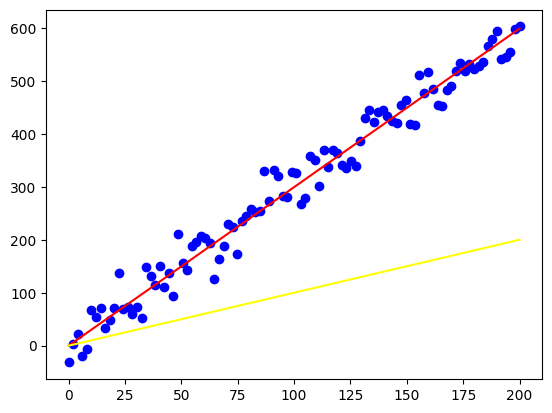

In [183]:
initial_pred = model(X, 0, 1)
pred = model(X, w0, w1)

plt.scatter(X, y, c="blue")
plt.plot(X, pred, c="red")
plt.plot(X, initial_pred, c="yellow")
plt.show()

# Vectorized Implementation

## Why Vectorization?

**Vectorization** uses matrix operations instead of loops, making computations much faster and more efficient.

## Mathematical Formulation (Vectorized)

### Matrix Notation:
$$
X = 
\begin{bmatrix}
1 & x_1 \\
1 & x_2 \\
\vdots & \vdots \\
1 & x_m
\end{bmatrix}
\quad (m \times 2 \text{ matrix})
$$

$$
\theta =
\begin{bmatrix}
w_0 \\
w_1
\end{bmatrix}
\quad (2 \times 1 \text{ vector})
$$

$$
y =
\begin{bmatrix}
y_1 \\
y_2 \\
\vdots \\
y_m
\end{bmatrix}
\quad (m \times 1 \text{ vector})
$$

### Hypothesis (Vectorized):

$$
h(X) = X\theta
$$

### Cost Function (Vectorized):

$$
J(\theta) = \frac{1}{2m} (X\theta - y)^T (X\theta - y)
$$

### Gradients (Vectorized):

$$
\nabla J(\theta) = \frac{1}{m} X^T (X\theta - y)
$$

### Parameter Update (Vectorized):

$$
\theta = \theta - \alpha \nabla J(\theta)
$$
